# Example of masks

## Creating an instance

An instance must be created before starting to operate with vector masks. The initialization accepts several arguments.

In [1]:
from diffractio import np
from diffractio import degrees, mm, um
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.vector_masks_XY import Vector_mask_XY

from py_pol.jones_matrix import Jones_matrix

## Polarization from standard elements

### Using defined polarizers

There are several standard polarizers:
- polarized_linear
- quarter_waveplate
- half_waveplate
- polarizer_retarder

<Figure size 432x288 with 0 Axes>

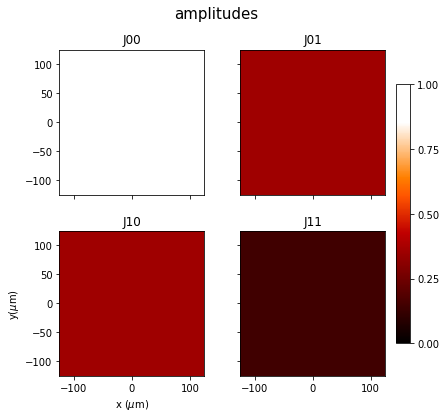

In [2]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)
wavelength = 0.6328 * um

# mask vectorial
vc = Vector_mask_XY(x0, y0, wavelength)
vc.polarizer_linear(azimuth=22.5 * degrees)
vc.draw(kind="amplitudes")

### Using py_pol module
If more general polarizer is required, we han use py_pol module

<Figure size 432x288 with 0 Axes>

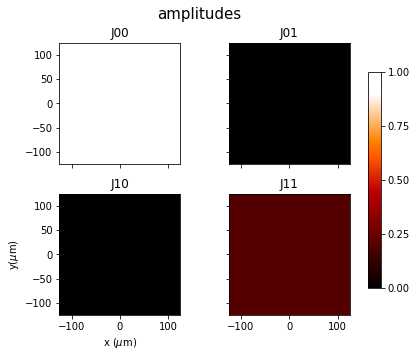

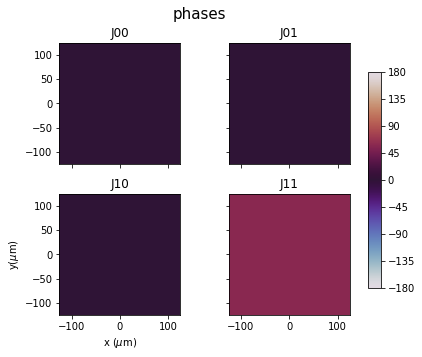

In [3]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)
wavelength = 0.6328 * um

PL = Jones_matrix("m0")
PL.from_components([0.9, 0, 0, 0.2 * np.exp(1j)])

vp = Vector_mask_XY(x0, y0, wavelength)
vp.from_py_pol(PL)

vp.draw(kind="jones_ap")

## Apply a mask to the polarizer

In [4]:
j0 = Jones_matrix().diattenuator_perfect(azimuth=-45 * degrees)

<Figure size 432x288 with 0 Axes>

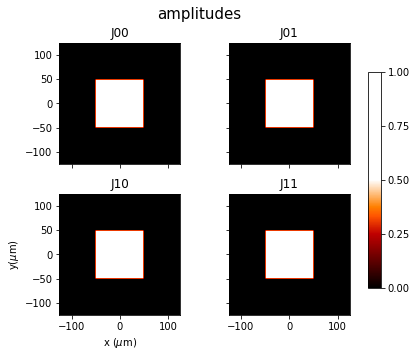

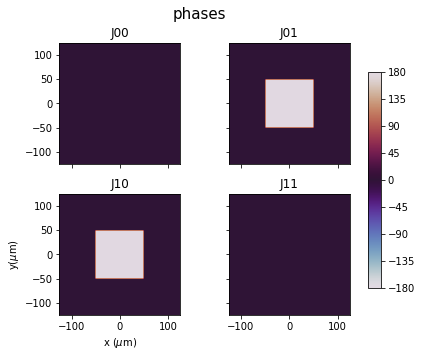

In [5]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.square(r0=(0 * um, 0 * um), size=(100 * um, 100 * um), angle=0 * degrees)

# mask vectorial
vc = Vector_mask_XY(x0, y0, wavelength)
vc.scalar_to_vector_mask(mask=mask, pol_state=j0)
vc.draw(kind="jones_ap")

## circle

Since normally a circular mask is used, a function for this is defined.
Therefore, an Scalar_XY mask is not required.

<Figure size 432x288 with 0 Axes>

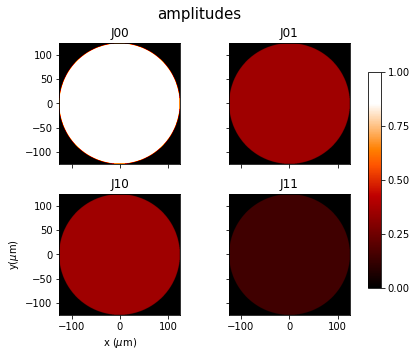

In [6]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)
wavelength = 0.6328 * um

# mask vectorial
vc = Vector_mask_XY(x0, y0, wavelength)
vc.polarizer_linear(azimuth=22.5 * degrees)
vc.apply_circle()
vc.draw(kind="amplitudes")

## Complementary mask

When we provide a binary mask, the 1 mask is converted to v1 polarization and 0 mask is converted to v2 polarization.

<Figure size 432x288 with 0 Axes>

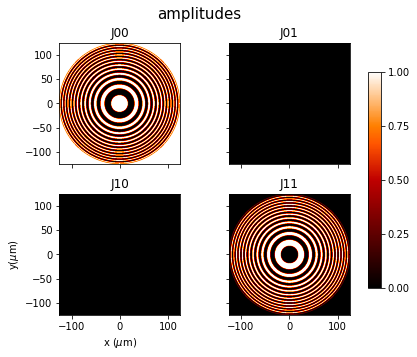

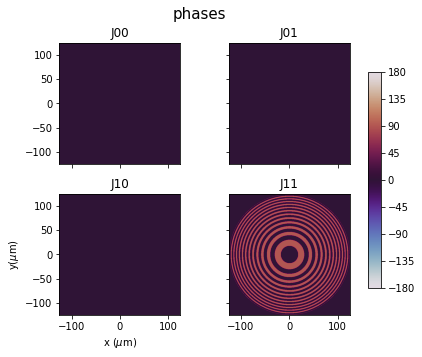

In [7]:
x0 = np.linspace(-125 * um, 125 * um, 512)
y0 = np.linspace(-125 * um, 125 * um, 512)
wavelength = 0.6328 * um

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.fresnel_lens(
    r0=(0 * um, 0 * um),
    radius=(125 * um, 125 * um),
    focal=(2 * mm, 2 * mm),
    angle=0 * degrees,
    kind="amplitudes",
)
mask.pupil()

EM0 = Vector_mask_XY(x0, y0, wavelength)
EM0.complementary_masks(
    mask=mask,
    pol_state_0=np.array([[1, 0], [0, 0]]),
    pol_state_1=np.array([[0, 0], [0, 1j]]),
)
EM0.draw(kind="jones_ap")

## SLM (Spatial Light modulator)

This vector mask simulate the behaviour of a SLM. Two parameters are provided: the first one is a scalar mask with the grey levels of the mask pixels. The second parameter is a LUT table with the Jones matrix for each grey level of the mask. The amplitude of the scalar mask is converted to (0-N) levels, where N is the number of Jones matrices at the LUT Table.

In [8]:
# Load the Jones calibration matrix of the SLM
SLM_matrix = np.load("calibration_slm_jones_2500.npz")
print(SLM_matrix.files)

# Convert to each element of the Jones matrix
j00 = SLM_matrix["J0"] * np.exp(1j * SLM_matrix["d0"])
j01 = SLM_matrix["J1"] * np.exp(1j * SLM_matrix["d1"])
j10 = SLM_matrix["J2"] * np.exp(1j * SLM_matrix["d2"])
j11 = SLM_matrix["J3"] * np.exp(1j * SLM_matrix["d3"])

['J0', 'J1', 'J2', 'J3', 'd0', 'd1', 'd2', 'd3']


In [9]:
# Convert the calibration matrix to a py_pol Jones matrix
states_jones = Jones_matrix("SLM")
states_jones.from_components([j00, j01, j10, j11])

In [10]:
x = np.linspace(-2 * mm, 2 * mm, 1024)
y = np.linspace(-2 * mm, 2 * mm, 1024)
wavelength = 0.6328 * um

<Figure size 432x288 with 0 Axes>

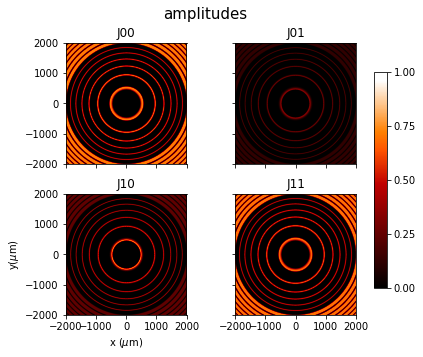

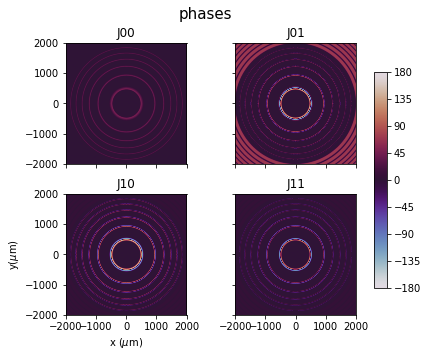

In [11]:
# Scalar lens
SLM1_scalar = Scalar_mask_XY(x=x, y=y, wavelength=wavelength)
SLM1_scalar.lens(r0=(0, 0), focal=500 * mm, radius=2 * mm)

# Pass phase to amplitude
SLM1_scalar.u = np.angle(SLM1_scalar.u)

# Vector lens
SLM1_vector = Vector_mask_XY(x=x, y=y, wavelength=wavelength)
SLM1_vector.SLM(SLM1_scalar, states_jones)
SLM1_vector.draw(kind="jones_ap")

## Pass to py_pol

In [12]:
m0 = EM0.to_py_pol()